* Name : Joonyoung-Choi
* Student ID: 20112096
* Description: Convolution to image
* github: https://github.com/mydream757/Computer_Vision

1. Import liabraries

* import needed libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

2. Define methods

* normalize data by this expression. $\qquad data_{normalized} = \frac{data-data_{min}}{data_{MAX}-data_{min}} $

In [2]:
# normalize the values of the input data to be [0, 1].
def normalize(data):
    data_normalized = (data - min(data)) / (max(data) - min(data))
    return(data_normalized)

* compute magnitude by this expression. $Mag = \sqrt{{dx}^2 + {dy}^2}$

In [3]:
#compute magnitude of vectors.
def compute_magnitude(dx,dy):
    #dx,dy are numpy arrays
    return (dx**2+dy**2)**0.5

* draw arrows. the arrows are used for visualizing the gradients at each square.

   I will separate origin arrays into arrays by 50x50. so the 'sampling_size' parameter is needed.

In [4]:
def draw_arrows(x,y,mean_x,mean_y,sampling_size):
    #mean_mag is used for making arrows-length longer or shorter on same ratio.
    mean_mag = compute_magnitude(mean_x,mean_y)
    #find max magnitude. It is max length of arrow
    mag_max = mean_mag.max()
    for j in range(mean_mag.size):
        #multiply same ratio to all arrow length
        dx = mean_x[j]*((sampling_size/2)/mag_max)
        dy = mean_y[j]*((sampling_size/2)/mag_max)
        #Thesetting can be changed by sampling size.
        plt.arrow(x[j],y[j],dx,dy,color='b'
                ,width=sampling_size/50, head_width=sampling_size/10, head_length=sampling_size/10,length_includes_head = False)

3. Main function

* the used image is 'cau.jpg'

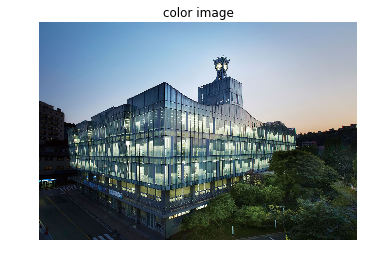

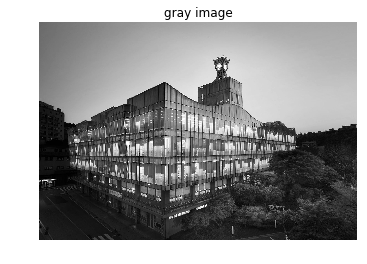

In [5]:
#get the image name

file_image = 'cau.jpg'
im_color = io.imread(file_image)
im_gray = color.rgb2gray(im_color)

#color image plot
p1 = plt.figure()
plt.title('color image')
plt.imshow(im_color)
plt.axis('off')

#gray image plot
p2 = plt.figure()
plt.title('gray image')
plt.imshow(im_gray, cmap='gray')
plt.axis('off')
plt.show()

* kernels for computing derivatives.

In [6]:
#kernels for computing x,y derivatives
kerY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) #for y-derivative
kerX = np.array([[1,0,-1],[2,0,-2],[1,0,-1]]) #for x-derivative
#convolved arrays
im_kerX = signal.convolve2d(im_gray, kerX, boundary='symm', mode='same')
im_kerY = signal.convolve2d(im_gray, kerY, boundary='symm', mode='same')

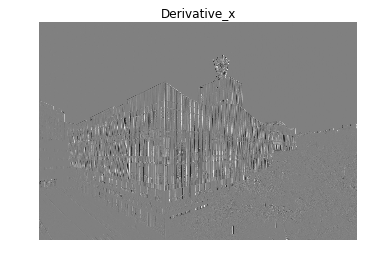

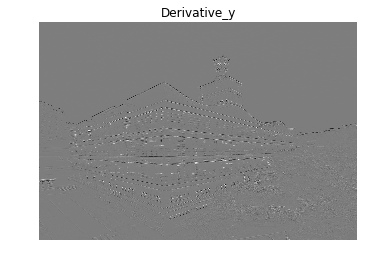

In [7]:
#Derivatives plot
p3 = plt.figure()
plt.title('Derivative_x')
plt.imshow(im_kerX, cmap='gray')
plt.axis('off')

p4 = plt.figure()
plt.title('Derivative_y')
plt.imshow(im_kerY, cmap='gray')
plt.axis('off')

plt.show()

* sampling size is very important of this program. this choose slicing size and size of overall arrows.

In [8]:
#this is the size of rows and column for sampling gradient.
#If sampling size is 50, sampling square(50x50).
sampling_size = 75

* this lists are used for saving x,y,dx,dy. It will change type into numpy array.

In [9]:
list_mean_x = []
list_mean_y = []
list_x = []
list_y = []

* get the convolution result of derivative kernels.

In [10]:
deri_x = signal.convolve2d(im_gray, kerX, boundary='symm', mode='same')
deri_y = signal.convolve2d(im_gray, kerY, boundary='symm', mode='same')
#for gradient
kerG = kerX + kerY                                     
im_conv = signal.convolve2d(im_gray, kerG, boundary='symm', mode='same')

* slice the origin arrays into several squares formed by 50x50.

In [11]:
#sampling squares and compute each mean in sliced arrays.
for i in range(np.size(deri_y,0)//sampling_size):
    for k in range(np.size(deri_x,1)//sampling_size):
        x = k*sampling_size
        y = i*sampling_size
        next_x = (k+1)*sampling_size
        next_y = (i+1)*sampling_size
        x_mean = np.mean(deri_x[y:next_y,x:next_x])
        y_mean = np.mean(deri_y[y:next_y,x:next_x])
        list_mean_x.append(x_mean)
        list_mean_y.append(y_mean)
        list_x.append((x+next_x)/2)
        list_y.append((y+next_y)/2)

* convert the results into numpy arrays.

In [12]:
#get numpy arrays of the results.
mean_x = np.array(list_mean_x)
mean_y = np.array(list_mean_y)
x = np.array(list_x)
y = np.array(list_y)

* plot the gradient image. it includes arrows.

  Arrows have some information. the length represents the mean-magnitude of sample space(50x50). the direction of arrow represents the mean-direction of sample space. 

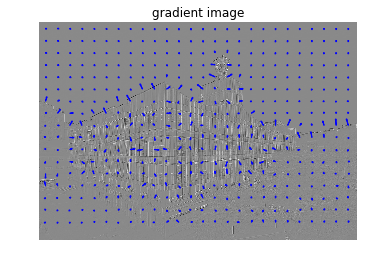

In [13]:
p5 = plt.figure()
plt.title('gradient image')
plt.imshow(im_conv, cmap='gray')
#draw arrows.
draw_arrows(x,y,mean_x,mean_y,sampling_size)

plt.axis('off')
plt.show()

* smoothing kernel and my own kernel are exhibited below this.

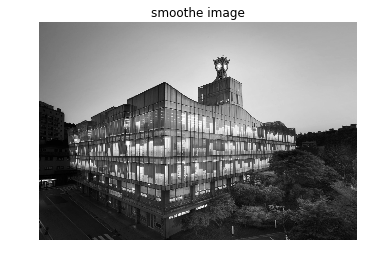

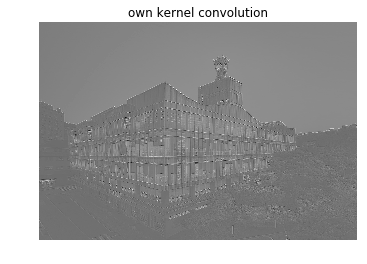

In [14]:
#for smoothing image
blur        = np.array([[0.5,1,0.5],[1,4,1],[0.5,1,0.5]])/8
result_blur =  signal.convolve2d(im_gray, blur, boundary='symm', mode='same')

own_kernel = np.array([[0,-1,-2],[1,1,-1],[0,1,2]])
im_own = signal.convolve2d(im_gray, own_kernel, boundary='symm', mode='same')

p6 = plt.figure()
plt.title('smoothe image')
plt.imshow(result_blur, cmap='gray')
plt.axis('off')

p7 = plt.figure()
plt.title('own kernel convolution')
plt.imshow(im_own, cmap='gray')
plt.axis('off')

plt.show()

* I think that my kernel makes the image more milky. It feels soft.